# Example how to define a charge slicing for HO BB

Uses installed version of py4madx from: https://github.com/iefthymio/py4madx.git 

In [1]:
import numpy as np
import pandas as pd
from scipy import special

import matplotlib.pyplot as plt

import sys
sys.path.append('../py4madx')

import qslice

In [19]:

def fnorm(x,mu,sig):   # --- normal distribution with (mu, sigma)
    return 1/(sig*np.sqrt(2*np.pi))*np.exp(-0.5*(x-mu)**2/sig**2)
def normzp(p, mu, sig):  # --- Quantile function of normal distribution with (mu, sigma)
    return mu + sig*np.sqrt(2)*special.erfinv(2*p-1)
def bari(y1, y2, mu, sig, scharge):
    return sig**2*(fnorm(y1, mu, sig) - fnorm(y2, mu, sig))/scharge

In [2]:
N_part_tot = 1.0
sigmaz = 3.0
N_slices = 15


In [6]:
df = qslice.qslice(N_part_tot, sigmaz, N_slices)
df.head()

,spos,id,charge
0,-5.818802,-7,0.066667
1,-3.868511,-6,0.066667
2,-2.910973,-5,0.066667
3,-2.188082,-4,0.066667
4,-1.575621,-3,0.066667


In [7]:
df.spos.values

array([-5.81880229e+00, -3.86851142e+00, -2.91097271e+00, -2.18808237e+00,
       -1.57562108e+00, -1.02342415e+00, -5.04286387e-01,  1.00000000e-09,
        5.04286387e-01,  1.02342415e+00,  1.57562108e+00,  2.18808237e+00,
        2.91097271e+00,  3.86851142e+00,  5.81880229e+00])

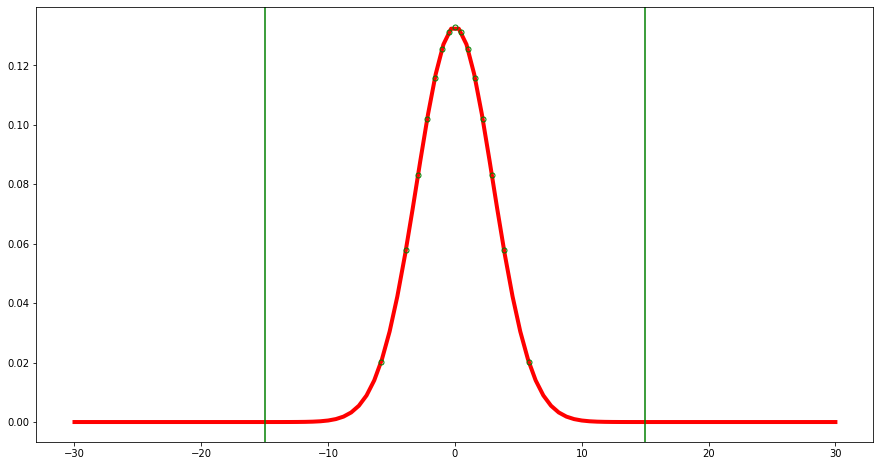

In [16]:
fig = plt.figure(figsize=(15,8))
x=np.linspace(-10*sigmaz,10.*sigmaz,100)
plt.plot(x,fnorm(x,0.0,sigmaz),'-',color='red',linewidth=4)
[plt.plot(x, fnorm(x,0.0,sigmaz), marker='o', fillstyle='none', markersize=5, color='green') for x in df.spos.values]
plt.axvline(-5.0*sigmaz, 0, 2.5, color='green')
plt.axvline(+5.0*sigmaz, 0, 2.5, color='green')

In [21]:
from itertools import zip_longest

qi = np.ones(N_slices)*1./float(N_slices)
qint = (np.arange(N_slices+1)*1/float(N_slices))[1:]
x_bin = normzp(qint, 0.0, sigmaz)
bb = []
bb.append(-sigmaz**2*fnorm(x_bin[0], 0.0, sigmaz)/qi[0])
[bb.append(bari(x_bin[i], x_bin[i+1], 0.0, sigmaz, qi[0])) for i in np.arange(len(x_bin)-1) ]


print(f'''[{'i':2s}]: {'qi':^12s} {'qint':^12s} {'xbin':^12s} {'bb':^12s}''')
a=[print(f'[{i:2d}]: {a:12.8f} {b:12.8f} {c:12.8f} {d:12.8f} ') for i,(a,b,c,d) in enumerate(zip_longest(qi, qint, x_bin, bb))]

[i ]:      qi          qint         xbin          bb     
[ 0]:   0.06666667   0.06666667  -4.50325784  -5.81880229 
[ 1]:   0.06666667   0.13333333  -3.33231485  -3.86851142 
[ 2]:   0.06666667   0.20000000  -2.52486370  -2.91097271 
[ 3]:   0.06666667   0.26666667  -1.86877717  -2.18808237 
[ 4]:   0.06666667   0.33333333  -1.29218190  -1.57562108 
[ 5]:   0.06666667   0.40000000  -0.76004131  -1.02342415 
[ 6]:   0.06666667   0.46666667  -0.25095520  -0.50428639 
[ 7]:   0.06666667   0.53333333   0.25095520   0.00000000 
[ 8]:   0.06666667   0.60000000   0.76004131   0.50428639 
[ 9]:   0.06666667   0.66666667   1.29218190   1.02342415 
[10]:   0.06666667   0.73333333   1.86877717   1.57562108 
[11]:   0.06666667   0.80000000   2.52486370   2.18808237 
[12]:   0.06666667   0.86666667   3.33231485   2.91097271 
[13]:   0.06666667   0.93333333   4.50325784   3.86851142 
[14]:   0.06666667   1.00000000          inf   5.81880229 
